###Pandas_homework

##First task

Function

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import re
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib import patches


def read_gff(input_gff):
    gff_dataframe = pd.read_csv(input_gff, sep='\t', header=1, 
                                names = ['chromosome','source', 'type', 'start', 'end', 'score', 'strand', 'phase','attributes'])
    return gff_dataframe

def read_bed6(input_bed):
    bed_dataframe = pd.read_csv(input_bed, sep='\t', 
                                names = ['chromosome','start', 'end', 'name', 'score', 'strand'])
    return bed_dataframe

In [ ]:
rrana_dataframe = read_gff("rrna_annotation.gff")
alignment_dataframe = read_bed6("alignment.bed")
rrana_dataframe

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3633020,3634549,0.000000e+00,-,.,Name=16S_rRNA;product=16S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
342,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
343,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


Simple attribute

In [4]:
rrana_dataframe.attributes = rrana_dataframe.attributes.str.replace(r' \(partial.*', r'', regex=True)
rrana_dataframe.attributes = rrana_dataframe.attributes.replace({'Name=23S_rRNA;product=23S ribosomal RNA' : '23S', 
                                                                 'Name=16S_rRNA;product=16S ribosomal RNA' : '16S', 
                                                                 'Name=5S_rRNA;product=5S ribosomal RNA' : '5S'})
rrana_dataframe

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
1,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
2,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
3,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
4,Reference_10,barrnap:0.9,rRNA,3633020,3634549,0.000000e+00,-,.,16S
...,...,...,...,...,...,...,...,...,...
342,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
343,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
344,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


Chromosome - rRNA ratio and barplot

In [5]:
rrana_dataframe_double = rrana_dataframe
rrana_dataframe_double.chromosome = rrana_dataframe_double.chromosome.str.replace(r'(\w+_)', r'', regex=True).astype('int64')

In [ ]:
rrana_dataframe_double.groupby('chromosome').aggregate({'attributes' : 'value_counts'})

attributes
chromosome attributes            
1          16S                  2
           23S                  2
           5S                   2
2          16S                  5
           23S                  5
...                           ...
25         23S                  3
           5S                   3
26         16S                  4
           23S                  4
           5S                   4

[76 rows x 1 columns]

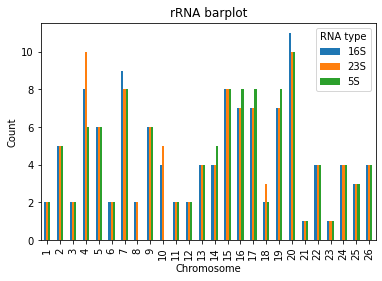

In [60]:
chromosome_count = rrana_dataframe_double.groupby('chromosome')['attributes'].value_counts()
chromosome_count.unstack(level=1).plot(kind='bar')
plt.title('rRNA barplot')
plt.legend(title="RNA type")
plt.ylabel('Count')
plt.xlabel('Chromosome')
plt.savefig('rRNA plot.png', dpi=300)

Intersect

In [21]:
rrana_dataframe = read_gff("rrna_annotation.gff")
alignment_dataframe = read_bed6("alignment.bed")
rrana_dataframe.attributes = rrana_dataframe.attributes.str.replace(r' \(partial.*', r'', regex=True)
rrana_dataframe.attributes = rrana_dataframe.attributes.replace({'Name=23S_rRNA;product=23S ribosomal RNA' : '23S', 
                                                                 'Name=16S_rRNA;product=16S ribosomal RNA' : '16S', 
                                                                 'Name=5S_rRNA;product=5S ribosomal RNA' : '5S'})

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
1,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
2,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
3,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
4,Reference_10,barrnap:0.9,rRNA,3633020,3634549,0.000000e+00,-,.,16S
...,...,...,...,...,...,...,...,...,...
342,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
343,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
344,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [22]:
alignment_dataframe

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [34]:
merged_data = rrana_dataframe.merge(alignment_dataframe, on=['chromosome'], suffixes=['_x','_y'])
merged_data

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126731,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126732,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126733,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126734,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


In [55]:
intersect_rrna_dataframe = merged_data.loc[(merged_data['start_y'] <= merged_data['start_x']) & (merged_data['end_y'] >= merged_data['end_x'])]
intersect_rrna_dataframe

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
117,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
144,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
171,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
203,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
230,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121843,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122170,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122571,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125048,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


##Second task

Preparation

In [3]:
dif_expr = pd.read_csv('/content/diffexpr_data.tsv.gz', sep='\t')
dif_expr

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


Function for dividing gene expression on 4 groups

In [4]:
def significant(data_frame):
  if data_frame.logFC < 0 and data_frame.log_pval < .95:
    return 'Non-significantly downregelated'
  elif data_frame.logFC < 0 and data_frame.log_pval > .95:
    return 'Significantly downregelated'
  elif data_frame.logFC > 0 and data_frame.log_pval > .95:
    return 'Significantly upregelated'
  else:
    return 'Non-significantly upregelated'

In [5]:
dif_expr['Significance'] = dif_expr.apply(significant, axis=1)
dif_expr

,Sample,logFC,pval,pval_corr,log_pval,Significance
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000,Non-significantly upregelated
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000,Non-significantly upregelated
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000,Non-significantly upregelated
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000,Non-significantly upregelated
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000,Non-significantly upregelated
...,...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227,Significantly downregelated
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000,Non-significantly downregelated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significantly downregelated
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000,Non-significantly downregelated


Limit determination

In [6]:
logFC_max = dif_expr.logFC.max() + 1
logFC_min = dif_expr.logFC.min() - 1
logFC_limit = max(abs(logFC_min), logFC_max)

Select record gene

In [7]:
significant_dataframe = dif_expr.query('log_pval >= .95')
top2_downregulated = significant_dataframe.sort_values(by=['logFC']).head(2)
top2_upregulated = significant_dataframe.sort_values(by=['logFC'], ascending = False).head(2)
top2_together = pd.concat([top2_downregulated, top2_upregulated], axis=0)

Create lists for annotation

In [81]:
record_genes = top2_together.Sample.tolist()
record_logFC = top2_together.logFC.tolist()
record_log_pval = top2_together.log_pval.tolist()
record_genes

['UMOD', 'MUC7', 'ZIC2', 'ZIC5']

In [21]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

Change settings rcParam

In [210]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Sans:italic:bold'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.width']: 1
plt.rcParams['xtick.major.size']: 10
plt.rcParams['xtick.major.width']: 1
plt.rcParams['xtick.major.size']: 10
plt.rcParams['font.serif']: 'Helvetica'

III. Graphs

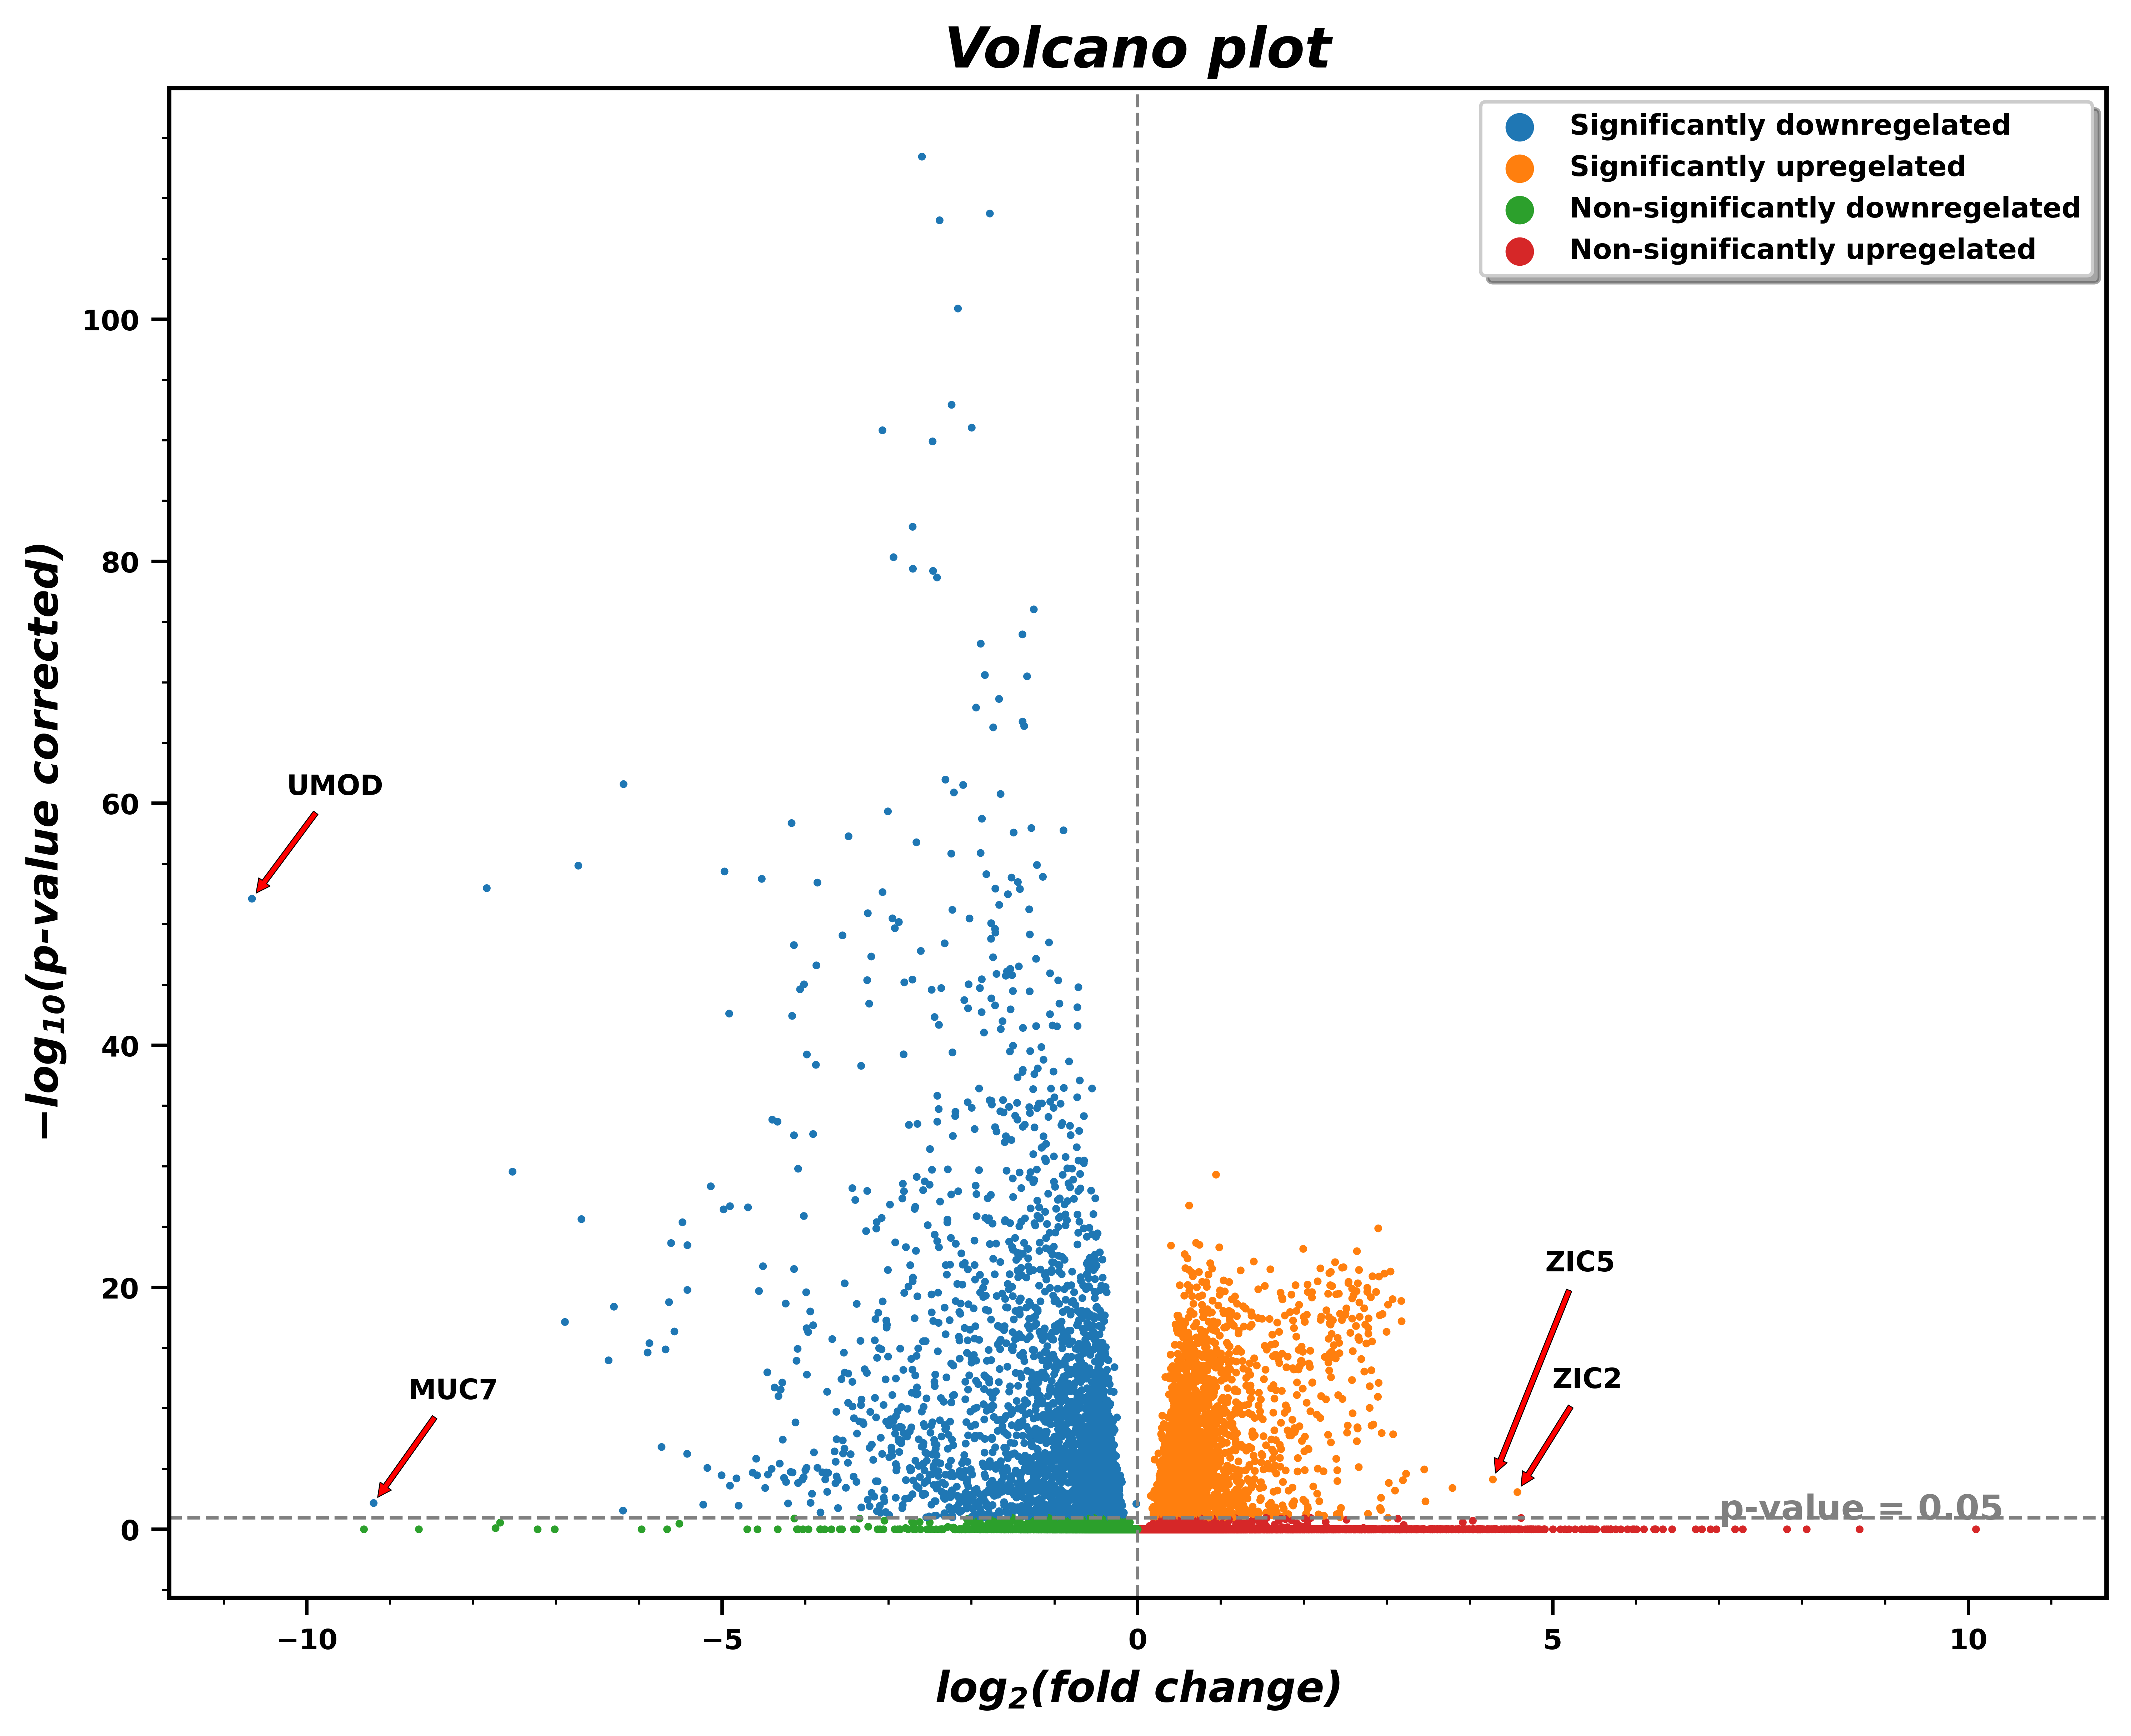

In [211]:
plt.figure(figsize=[10,8], dpi=700)
expr_graph = sns.scatterplot(data=dif_expr, x="logFC", y="log_pval", 
                             hue='Significance', 
                             hue_order=['Significantly downregelated', 'Significantly upregelated',
                                        'Non-significantly downregelated', 'Non-significantly upregelated'],
                             s=5, alpha=1, linewidth=0)
expr_graph.axhline(y=0.95, color='grey', linewidth=1, linestyle='dashed')
plt.text(7, 1.6, 'p-value = 0.05', horizontalalignment='left', verticalalignment='center', 
         color='grey', size=10, fontweight = 'bold')
expr_graph.axvline(x=0, color='grey', linewidth=1, linestyle='dashed')
plt.xlabel(r'$\bf {log_{2}}}$(fold change)', fontweight = 'bold', fontstyle = 'italic', size=12)
plt.xticks(fontweight = 'bold', size=8)
plt.ylabel(r'$\bf {-log_{10}}$(p-value corrected)', fontweight = 'bold', fontstyle = 'italic', size=12)
plt.yticks(fontweight = 'bold', size=8)
plt.tick_params(which='major', width=1, size=5)
plt.setp(expr_graph.spines.values(), linewidth=1.3)
expr_graph.set_xlim(right=logFC_limit, left=-logFC_limit)
font = font_manager.FontProperties(weight='bold', size=8)
expr_graph.legend(prop=font, markerscale=1.2, shadow=True)
expr_graph.annotate(record_genes[0], xy=(record_logFC[0], record_log_pval[0]), xycoords='data',
                    xytext=(+10, +30), textcoords='offset points', fontsize=8, fontweight='bold',
                    arrowprops=dict(arrowstyle="simple", facecolor='red', edgecolor="black", lw=.25))
expr_graph.annotate(record_genes[1], xy=(record_logFC[1], record_log_pval[1]), xycoords='data',
                    xytext=(+10, +30), textcoords='offset points', fontsize=8, fontweight='bold',
                    arrowprops=dict(arrowstyle="simple", facecolor='red', edgecolor="black", lw=.25))
expr_graph.annotate(record_genes[2], xy=(record_logFC[2], record_log_pval[2]), xycoords='data',
                    xytext=(+10, +30), textcoords='offset points', fontsize=8, fontweight='bold',
                    arrowprops=dict(arrowstyle="simple", facecolor='red', edgecolor="black", lw=.25))
expr_graph.annotate(record_genes[3], xy=(record_logFC[3], record_log_pval[3]), xycoords='data',
                    xytext=(+15, +60), textcoords='offset points', fontsize=8, fontweight='bold',
                    arrowprops=dict(arrowstyle="simple", facecolor='red', edgecolor="black", lw=.25))
plt.title('Volcano plot', fontweight = 'bold', fontstyle = 'italic', size=16)
plt.savefig('Volcano_plot.png')

##Third task

Preparation

In [164]:
cancer_data = pd.read_csv('/content/Worldwide Cancer Dataset.csv')
cancer_data

,Rank,Cancer,New cases in 2020,% of all cancers
0,NaN,All cancers*,"18,094,716",NaN
1,1.0,Breast,"2,261,419",12.5
2,2.0,Lung,"2,261,771",12.2
3,3.0,Colorectal**,"1,931,590",10.7
4,4.0,Prostate,"1,414,259",7.8
5,5.0,Stomach,"1,089,103",6.0
6,6.0,Liver,"905,677",5.0
7,7.0,Cervix uteri,"604,127",3.3
8,8.0,Oesophagus,"604,100",3.3
9,9.0,Thyroid,"586,202",3.2


In [165]:
cancer_data = cancer_data.rename(columns={'Rank': 'Rank', 'Cancer': 'Cancer', 'New cases in 2020': 'New', '% of all cancers': 'Percent'})

In [167]:
cancer_data['New'] = cancer_data['New'].str.replace(',','')
cancer_data

,Rank,Cancer,New,Percent
0,NaN,All cancers*,18094716,NaN
1,1.0,Breast,2261419,12.5
2,2.0,Lung,2261771,12.2
3,3.0,Colorectal**,1931590,10.7
4,4.0,Prostate,1414259,7.8
5,5.0,Stomach,1089103,6.0
6,6.0,Liver,905677,5.0
7,7.0,Cervix uteri,604127,3.3
8,8.0,Oesophagus,604100,3.3
9,9.0,Thyroid,586202,3.2


In [172]:
cancer_data = cancer_data.drop([0])
major_cancer = cancer_data.query('Percent >= 3')
other_cancer = cancer_data.query('Percent < 3')
other_cancer

,Rank,Cancer,New,Percent
12,12.0,Pancreas,495773,2.7
13,13.0,Leukaemia,474519,2.6
14,14.0,Kidney,431288,2.4
15,15.0,Corpus uteri,417367,2.3
16,16.0,"Lip, oral cavity",377713,2.1
17,17.0,Melanoma of skin,324635,1.8
18,18.0,Ovary,313959,1.7
19,19.0,"Brain, central nervous system",308102,1.7
20,20.0,Larynx,184615,1.0
21,21.0,Multiple myeloma,176404,1.0


In [244]:
other_cancer['Percent'].sum()
other_cancer['New'].astype(int).sum()
other_cancer['New'] = other_cancer['New'].astype(int)
other_cancer['Percent'] = other_cancer.apply(lambda row: row.New / 4311828, axis=1)
other_cancer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rank,Cancer,New,Percent
12,12.0,Pancreas,495773,0.114980
13,13.0,Leukaemia,474519,0.110051
14,14.0,Kidney,431288,0.100024
15,15.0,Corpus uteri,417367,0.096796
16,16.0,"Lip, oral cavity",377713,0.087599
17,17.0,Melanoma of skin,324635,0.075289
18,18.0,Ovary,313959,0.072813
19,19.0,"Brain, central nervous system",308102,0.071455
20,20.0,Larynx,184615,0.042816
21,21.0,Multiple myeloma,176404,0.040912


In [176]:
major_cancer.loc[len(major_cancer)] = [12.0, 'Other', 4311828, 23.8]
major_cancer

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


,Rank,Cancer,New,Percent
1,1.0,Breast,2261419,12.5
2,2.0,Lung,2261771,12.2
3,3.0,Colorectal**,1931590,10.7
4,4.0,Prostate,1414259,7.8
5,5.0,Stomach,1089103,6.0
6,6.0,Liver,905677,5.0
7,7.0,Cervix uteri,604127,3.3
8,8.0,Oesophagus,604100,3.3
9,9.0,Thyroid,586202,3.2
10,10.0,Bladder,573278,3.2


Short analysis

In [ ]:
ratio = major_cancer['Percent'].tolist()
cancer = major_cancer['Cancer'].tolist()
other_ratio = other_cancer['Percent'].tolist()
other_label = other_cancer['Cancer'].tolist()

Graphs

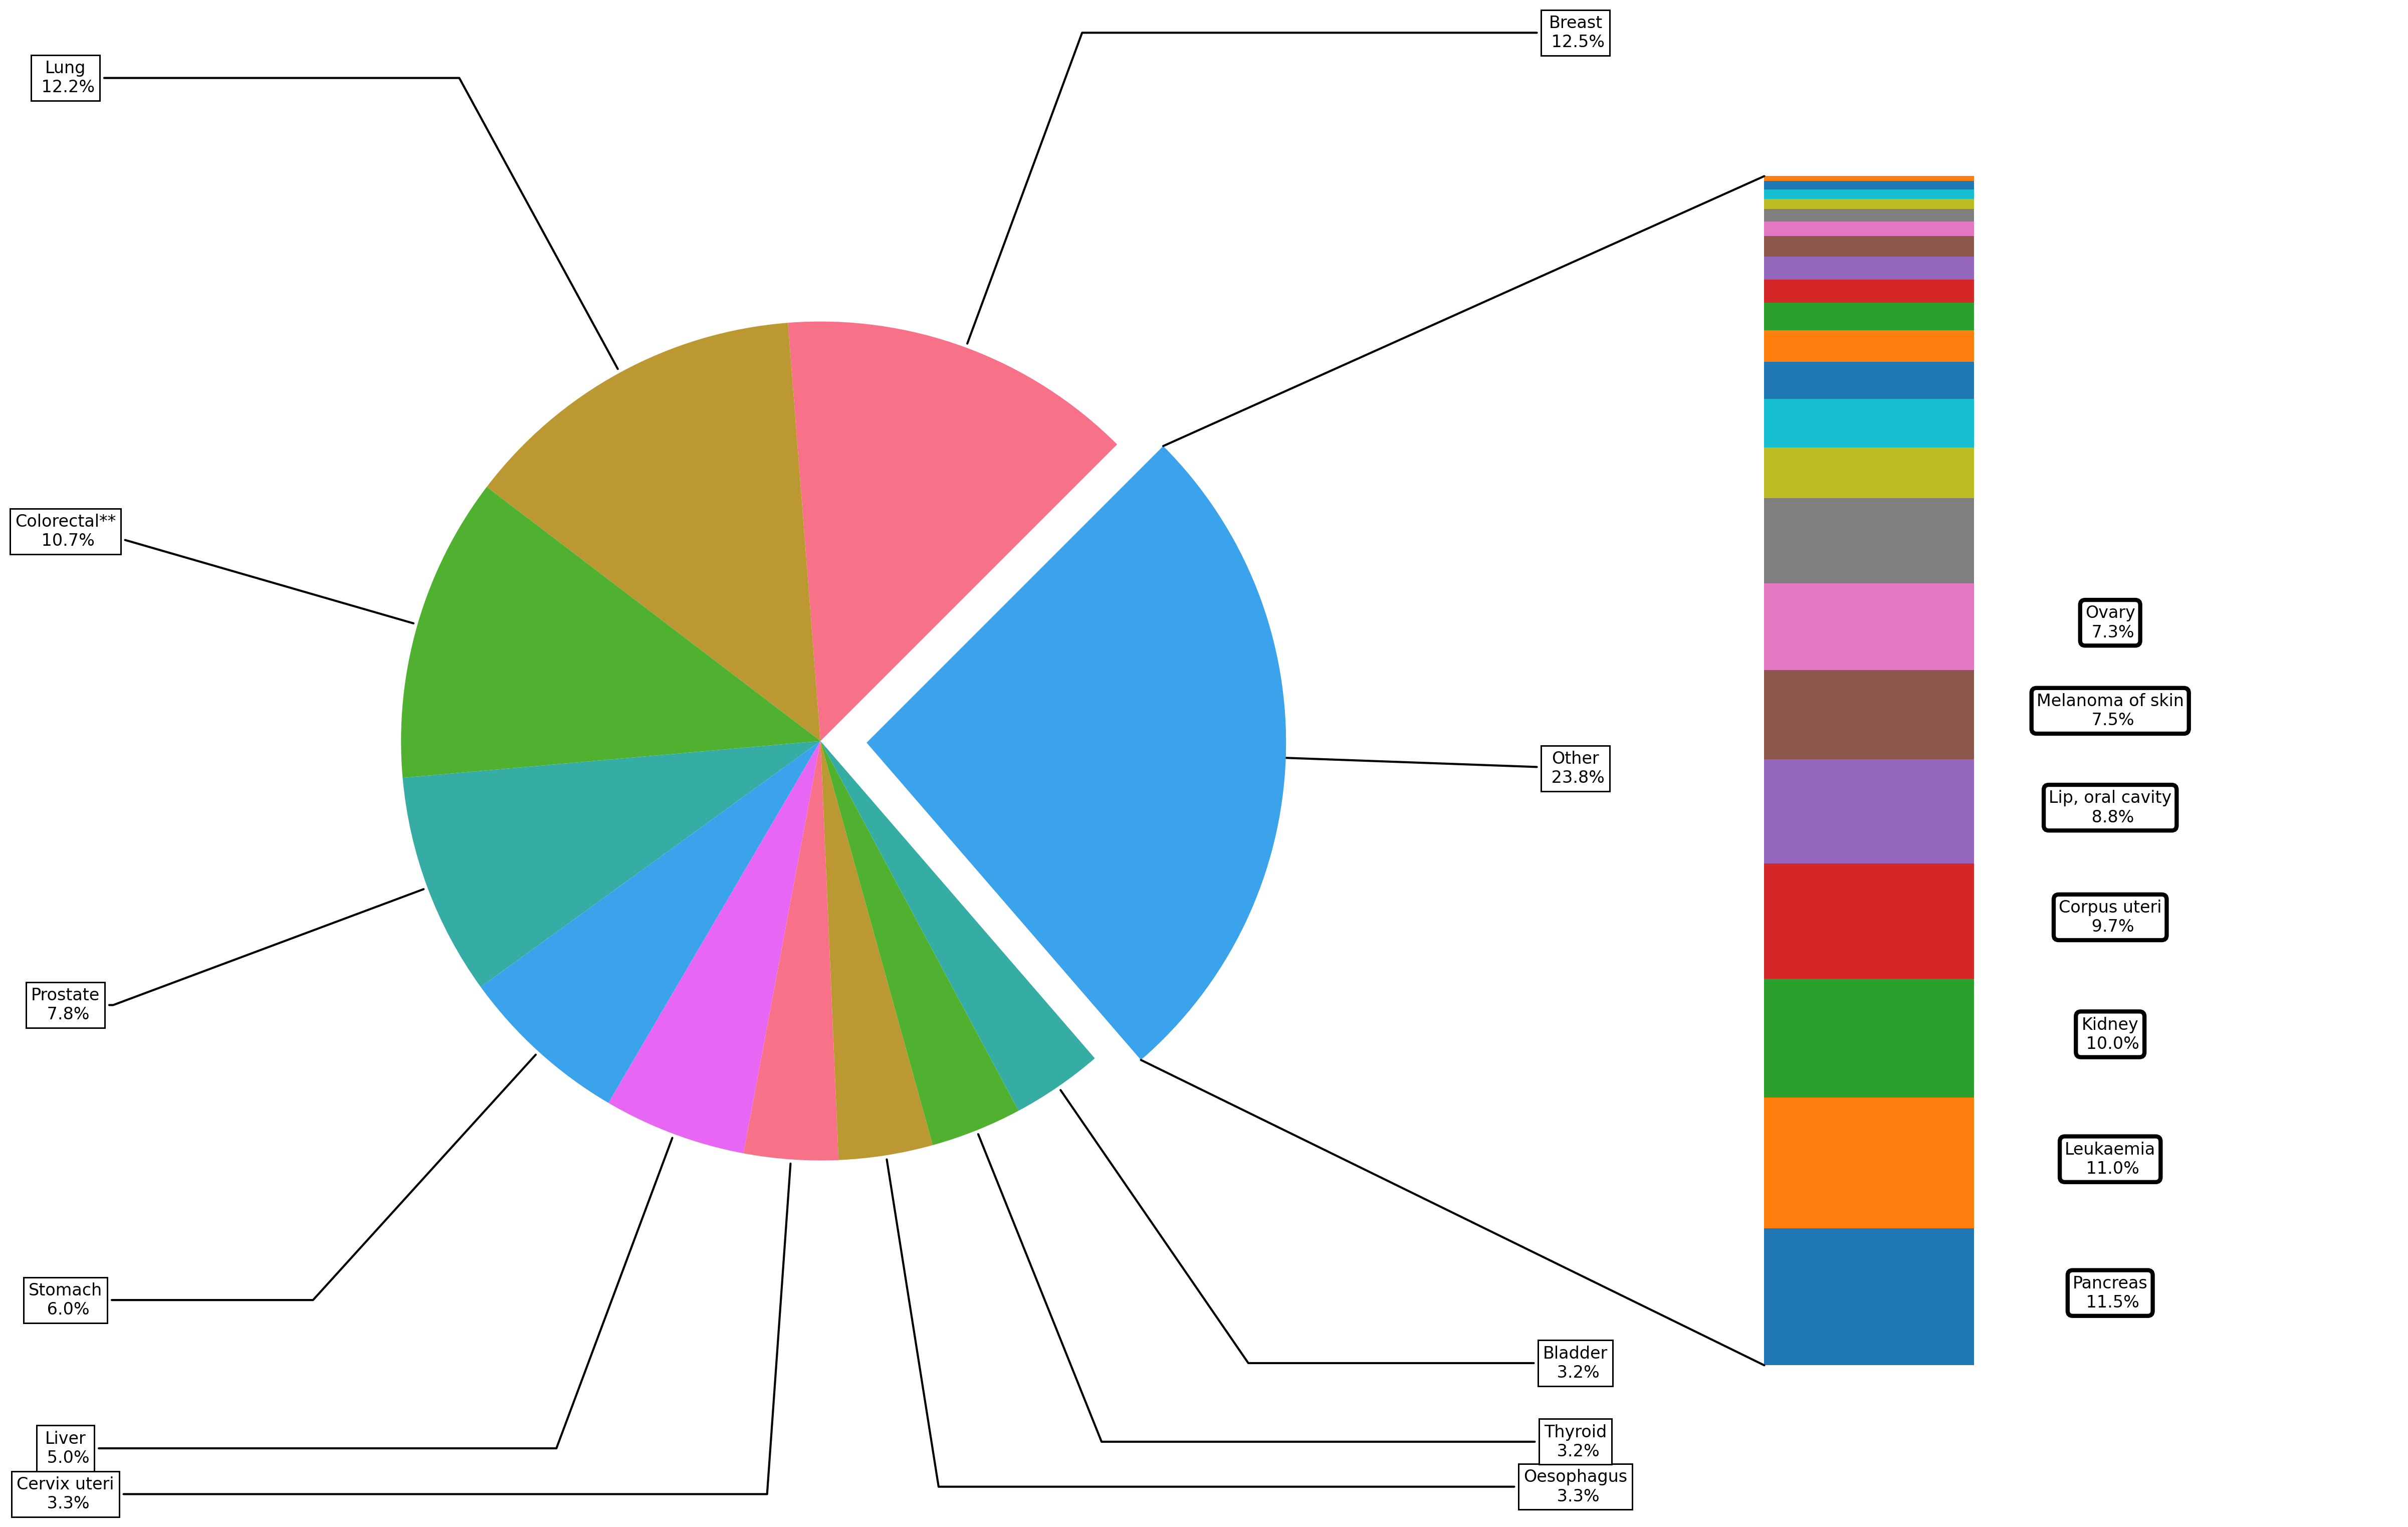

In [398]:
distrib, (part1, part2) = plt.subplots(1, 2, figsize=(18, 11), dpi=300)
distrib.subplots_adjust(wspace=0)

explode = [0]*(len(major_cancer)-1) + [0.11]
angle = 90 * ratio[0]
colors = sns.color_palette("husl")[0:11]

wedges, *_ = part1.pie(ratio, startangle=angle, explode=explode, colors=colors)

bottom = 1
width = 0.2
start = 0
for j in range(len(other_ratio)):
    height = other_ratio[j]
    part2.bar(start, height, width, bottom=bottom)
    grow = bottom + part2.patches[j].get_height() / 2
    bottom += height
    
part2.axis('off')
part2.set_xlim(-2.5* width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[10].theta1, wedges[10].theta2
center, r = wedges[10].center, wedges[10].r
bar_height = sum(other_ratio)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height * 2), coordsA=part2.transData,
                      xyB=(x, y), coordsB=part1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
part2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=part2.transData,
                      xyB=(x, y), coordsB=part1.transData)
con.set_color([0, 0, 0])
part2.add_artist(con)
con.set_linewidth(1)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    part1.annotate(s = f'{cancer[i]}\n {ratio[i]}%', xy=(x, y), xytext=(1.8*np.sign(x), 1.8*y),
                   fontsize=8, horizontalalignment='center', **kw)
bottom = 1
x = 0.2
for i in range(7):
    y = bottom + other_ratio[i] / 2
    bottom += other_ratio[i]
    part2.annotate(s = f'{other_label[i]}\n {"%.1f" % (other_ratio[i]*100)}%', xy=(x, y), xycoords='data',
                    xytext=(+15, -5), textcoords='offset points', fontsize=8, horizontalalignment='center',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', lw=2))

plt.savefig('Pie_plot.png')